<a href="https://colab.research.google.com/github/Dimitridze/TML/blob/master/OverF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automatically created module for IPython interactive environment
X  [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
y  [ 0.30177951  0.52411182  1.02701456  0.70871565  0.98190638 -0.47923266
 -0.49435992 -0.56109459 -0.81178282 -0.88565746 -1.09428634 -1.22065082
 -0.95708437 -0.87570208 -0.64137802 -0.41020871 -0.29976328 -0.23382782
  0.30522933  0.68320341  0.65688333  1.17769072  0.88232124  0.94302773
  0.77797858  0.95318985  0.43535518  0.47051048  0.21940441  0.25045356]
Degree 1
MSE = 0.5957221999847258
-0.15758400140890558
B [1.598521853841406e-33]
Degree 2
MSE = 0.4075380753361716
1.0138279574307216
B [1.598521853841406e-33, 4.770143286258306e-31]
Degree 3
MSE = 0.44473826139585376
1.6981744

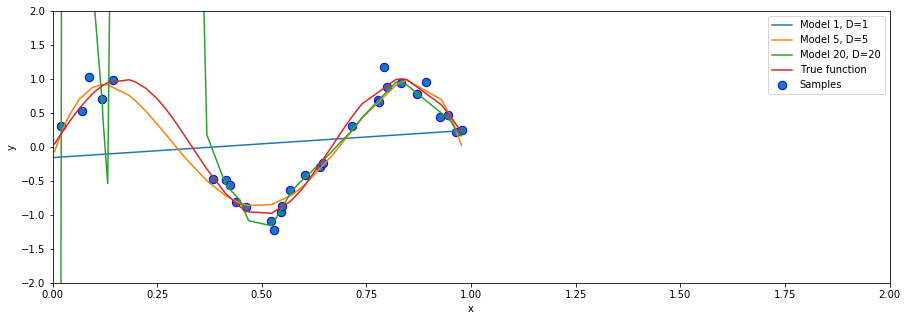

y and prediction [ 0.30177951  0.52411182  1.02701456  0.70871565  0.98190638 -0.47923266
 -0.49435992 -0.56109459 -0.81178282 -0.88565746 -1.09428634 -1.22065082
 -0.95708437 -0.87570208 -0.64137802 -0.41020871 -0.29976328 -0.23382782
  0.30522933  0.68320341  0.65688333  1.17769072  0.88232124  0.94302773
  0.77797858  0.95318985  0.43535518  0.47051048  0.21940441  0.25045356] [ 4.76923646e-34  8.42978565e-34  1.64097573e-33  1.13517457e-33
  1.57065186e-33 -7.66079125e-34 -7.58679611e-34 -9.79073950e-34
 -1.21917593e-33 -1.44658227e-33 -1.85491313e-33 -1.78946034e-33
 -1.52966749e-33 -1.44949750e-33 -1.04718999e-33 -6.37691022e-34
 -4.58223644e-34 -3.93242380e-34  4.81516361e-34  1.12356182e-33
  1.19198000e-33  1.48414148e-33  1.63746650e-33  1.52653392e-33
  1.20602951e-33  1.55551104e-33  6.75465435e-34  7.50396147e-34
  3.32033006e-34  3.78864701e-34]
y and prediction [-0.1573491   0.7995994   0.465134    1.05673273  0.95233147  1.14014773
  0.79790891  1.79259187  0.96907032  

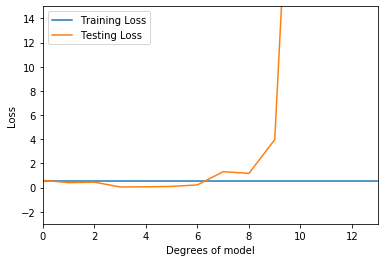

Training losses:  [0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967725, 0.5431822156967724, 0.5431822156967284, 0.5431822156279159, 0.5431822146915563, 0.543181880620269, 0.5431637479540922, 0.5393448596965755, 0.5431622249426494, 66.89129685772517]
Test losses:  [0.5957221999847258, 0.4075380753361716, 0.44473826139585376, 0.04863072087129966, 0.062447725752128404, 0.09619044415114368, 0.22004229805220846, 1.3142140307252121, 1.1786833780239743, 3.9687662245928137, 46.1045315190208, 915.0190720159965, 2514.296484010606, 7752.296494008091, 313725.2545268721, 3962.17289695531, 109449420.91909997, 17838737.568422593, 1472425.5831383965, 13202634418.499979]


In [77]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.sin(3 * np.pi * X )

np.random.seed(0)

n_samples = 30
degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
numb=0
X = np.sort(np.random.rand(30))
print("X ",X)
y = true_fun(X) + np.random.randn(n_samples) * 0.13
print("y ",y)
X_test = np.sort(np.random.rand(50))
a=[]
b=[]
y_test = true_fun(X_test) + np.random.randn(50) * 0.5
thetas=[]
plt.figure(figsize=(15, 5))
for i in degrees:
    numb=numb+1
    polynomial_features = PolynomialFeatures(degree=i,
                                       include_bias=False)
    linear_regression = LinearRegression()
    # Evaluate the models using crossvalidation
    
    
   # print("Scores= ",scores)
    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=20)
    pipeline.fit(X[:, np.newaxis], y)
    print("Degree {}\nMSE = {}".format(
        i, -scores.mean()))
    a.append(-scores.mean())
    print(linear_regression.intercept_)
    theta=linear_regression.intercept_
    
    thetas.append(theta)
    scores2 = cross_val_score(pipeline, X_test[:, np.newaxis], pipeline.predict(X_test[:,np.newaxis]),scoring="neg_mean_squared_error", cv=20)
    b.append(-scores2.mean())
    print("B",b)
    if(i==1 or i==5 or i==20):
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model {}, D={}".format(numb,i))
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=70, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 2))
plt.ylim((-2, 2))
plt.legend(loc="best")
    
plt.show()


def loss_function(W,X,Y):
    prediction = pipeline.predict(X[:,np.newaxis])*W.T
    print("y and prediction",Y,prediction)
    loss = (prediction - Y)**2
    return np.mean(loss)

trainLosses = []
testLosses = []
for degree in range(20):
    trainLoss = loss_function(b[degree],X,y)
    trainLosses.append(trainLoss)
    testLoss = loss_function(thetas[degree],X_test,y_test)
    testLosses.append(testLoss)
    
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Degrees of model")
plt.plot(np.arange(19),trainLosses[:19],label='Training Loss')
plt.plot(np.arange(20),a[:20],label='Testing Loss')
plt.ylim(-3,15)
plt.xlim(0,13)
plt.legend()
plt.show()

print("Training losses: ",trainLosses)
print("Test losses: ", a[:20])

